# Inits

In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import time
import collections
from typing import Dict
from typing import List
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import imp
%matplotlib inline

import sys
sys.path.insert(0, '../src/')

import network_utils
import utils

In [2]:
def reload():
    imp.reload(network_utils)
    imp.reload(utils)

# Helper Functions

In [3]:
def plot_all_triads(triad_list, n=8):  
    m = np.ceil(len(triad_list) / n)
    sns.set(rc={'figure.figsize': (2*n, 2.5*m)})
    all_positions = None
    for index, triad in enumerate(triad_list):
        plt.subplot(m, n, index + 1)
        dgraph = utils.adjacency2digraph(triad)
        if not all_positions:
            all_positions = nx.layout.spring_layout(dgraph)
        labels = nx.get_edge_attributes(dgraph, 'weight')
        nx.draw(dgraph, pos=all_positions, with_labels=False)
        nx.draw_networkx_edge_labels(dgraph, pos=all_positions, edge_labels=labels)
        transitivity_str = 'Y' if network_utils.is_transitive_balanced(triad) else 'N'
        title_name = 'T{} ({})'.format(index + 1, transitivity_str)
        plt.title(title_name)

# Sparse Structural Balance Theory Triads

In [4]:
triad_map, triad_list = network_utils.generate_all_possible_sparse_triads()
unique_triad_num = len(triad_list)

In [14]:
balanced = 0
transitive_balances = []
for triad in triad_list:
    bal = network_utils.is_transitive_balanced(triad)
    transitive_balances.append(bal)
    if bal:
        balanced += 1
print('Transitive balanced triads: ', balanced)
print('Out of triads: ', len(triad_list))

Transitive balanced triads:  93
Out of triads:  138


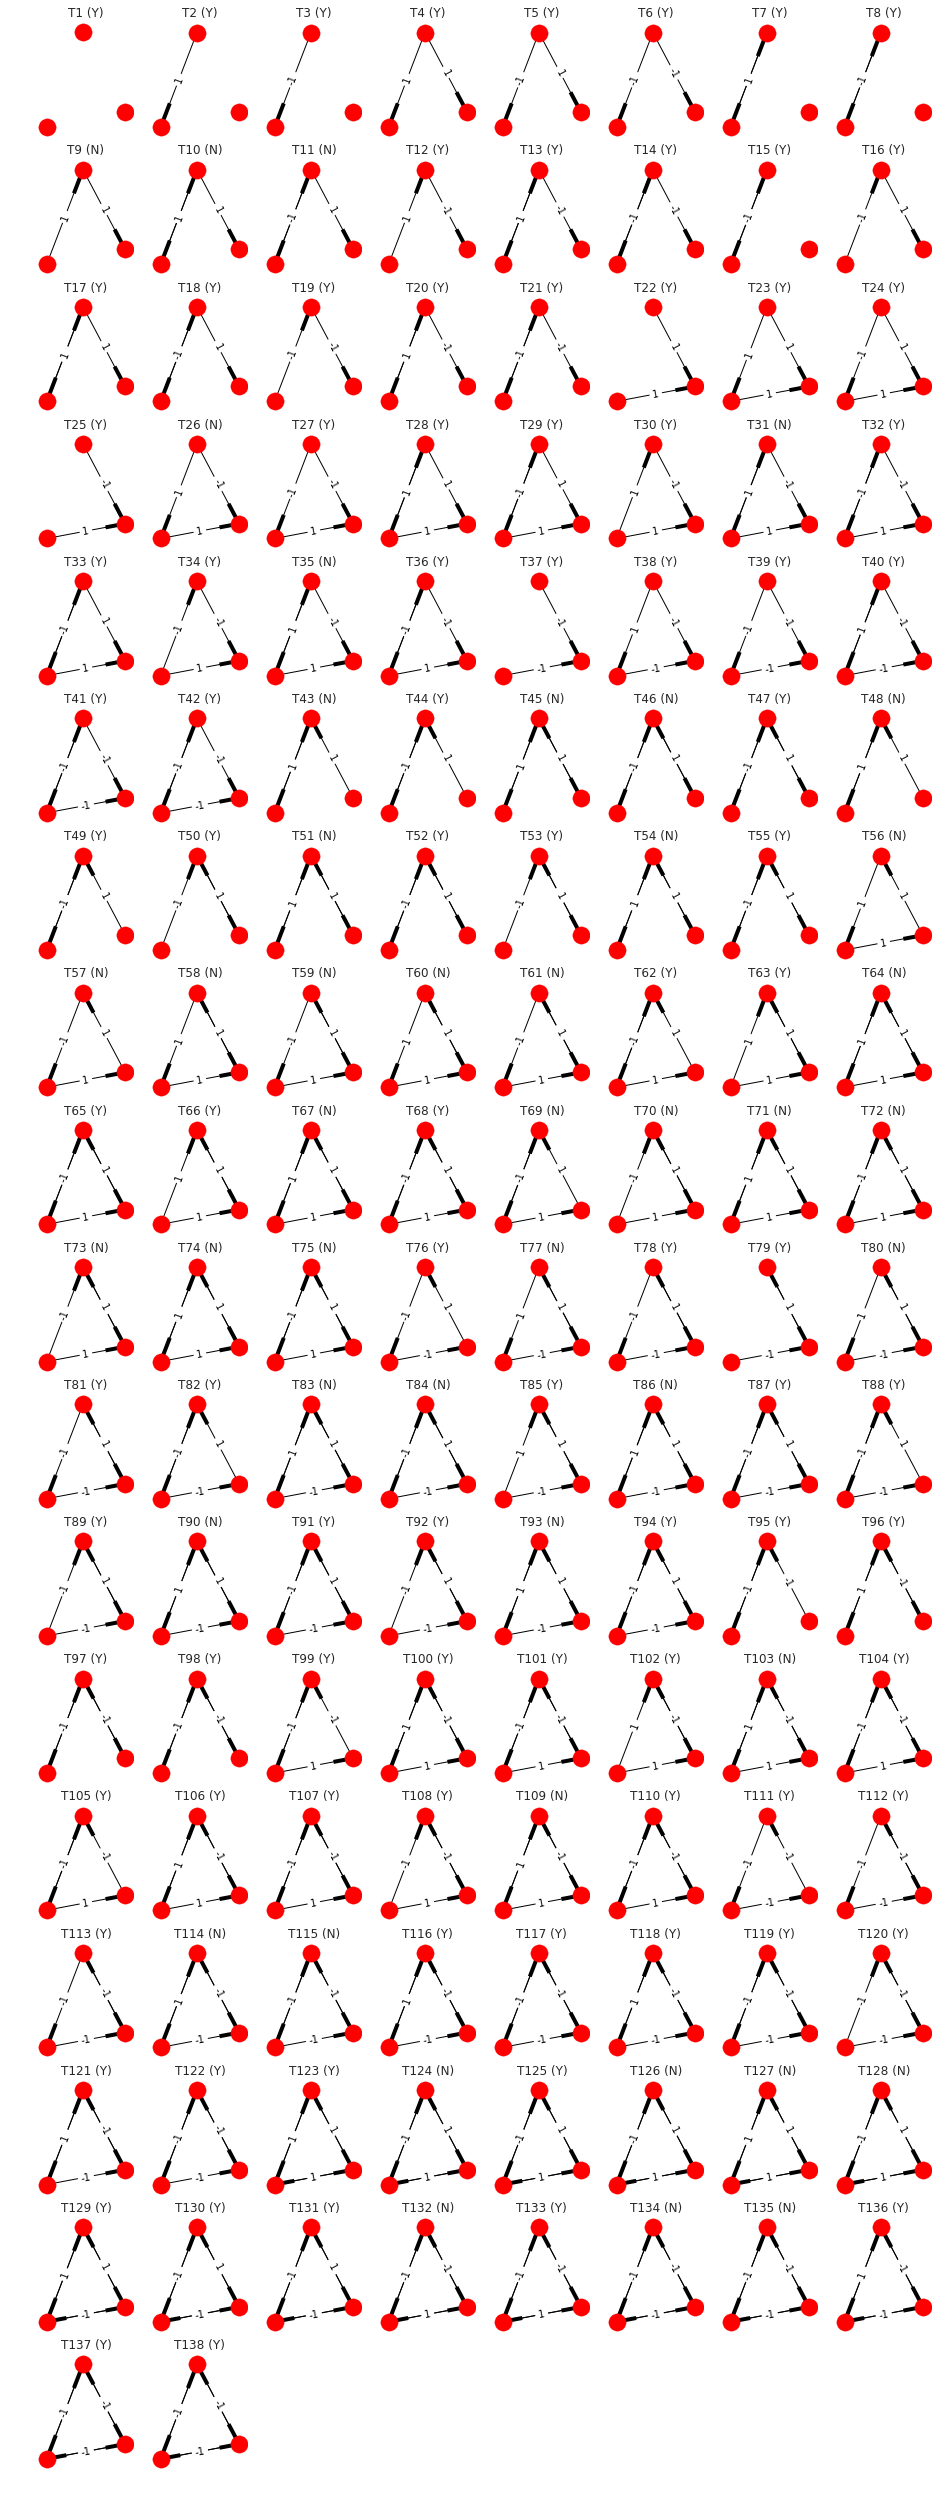

In [13]:
plot_all_triads(triad_list, n=8)